## 線形回帰
### 重回帰
- $y = w_0x_0+w_1x_1+w_2x_2+...+w_Nx_N+	b+ \epsilon$
### 単回帰
- $y = wx+b+\epsilon$

少しこの式を行列表示にすると以下のように書ける

- $y=f(x)+\epsilon$
- $f(x)=\begin{pmatrix} w&b \end{pmatrix}\begin{pmatrix} x\\1 \end{pmatrix}$

$\boldsymbol{w}=\begin{pmatrix} w&b \end{pmatrix}, \boldsymbol{x}=\begin{pmatrix} x&1 \end{pmatrix}$とすると
- $f(\boldsymbol{x})=\boldsymbol{w}\cdot\boldsymbol{x}^T$
- $y=f(\boldsymbol{x})+\epsilon$

と表すことができる。つまり、$\boldsymbol{x}$はデータ、$\boldsymbol{w}$は推定したいパラメータ、$y$は予測したい値（目的変数）となる

##  単回帰モデルにおけるデータの生成とパラメータの推定
$\boldsymbol{w}=\begin{pmatrix} 2&3 \end{pmatrix},\epsilon = \mathcal{N}(\mu=0,\sigma^2=10)$ の乱数としたときにデータを生成し、データのみからパラメータ$\boldsymbol{w}$を推定してみよう

### データの生成

In [1]:
import random
import numpy as np

In [2]:
# 生成するデータ数
N = 1000
w = np.array((2,3),dtype=np.float32)

In [3]:
x = np.random.rand(N,2)*100
x[:,1] = 1.0

In [4]:
x

array([[69.23786471,  1.        ],
       [23.00647111,  1.        ],
       [17.66979499,  1.        ],
       ...,
       [13.99968543,  1.        ],
       [92.02642728,  1.        ],
       [10.96963987,  1.        ]])

In [5]:
y = np.dot(w,x.T) + np.random.normal(0,25,N)

In [6]:
y.shape

(1000,)

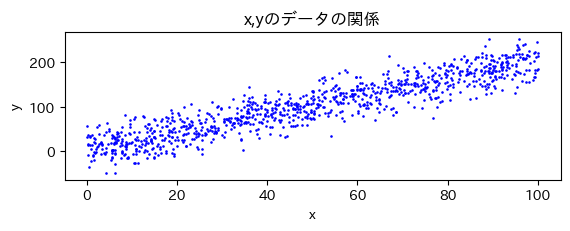

In [7]:
# x[:,0]とyのプロット
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=0.5)
#fig.suptitle("all graph")

ax1 = fig.add_subplot(211, title="x,yのデータの関係",xlabel="x", ylabel="y")
ax1.scatter(x[:,0], y, marker='.', s=3, c='blue')

fig.show()


### 最小二乗法によるパラメータの推定
- ノイズの部分($\mathcal{N}$)を無視すると、予測値は、$\hat{y}=\hat{f}(\boldsymbol{x})$となる
- 今、i番目のデータの予測値を$\hat{y}^i$のように表すと、i番目の実際の値と予測値の差は$y^i-\hat{y}^i$と計算できる
- この予測値との差は大きめに予測したり、小さめに予測したりといったことがあり、正負となるため、単に二乗してすべて正として扱い、すべてのxでの合計を計算してみよう
- $L=\Sigma_i^N(y^i-\hat{y}^i)^2$
- この実際の値と予測値との差の２乗の合計を最小化するのが最小二乗法の考え方である
- 実際に求めたいのは$\boldsymbol{w}$なので、上の式を分解すると
- $L(\boldsymbol{w})=\Sigma_i^N(y^i-\boldsymbol{w}\cdot\boldsymbol{x}^i)^2$
- $y^i, \boldsymbol{x}^i$はデータ、求めたいのは$\boldsymbol{w}=\begin{pmatrix} w&b \end{pmatrix}$であることに注意するとLは$\boldsymbol{w}$の２次関数である。その意味を込めて、残差平方和$L$を$L(\boldsymbol{w})$と書いた

### （横道）Lとwの関係をグラフ化
- b=3は既知ということで書いてみよう

In [8]:
w0 = np.arange(-5,5,0.1)
b = np.ones((w0.shape))*3

In [9]:
w = np.array((w0,b)).T

In [10]:
y_hat = np.dot(w,x.T)

In [11]:
y_hat.shape

(100, 1000)

In [12]:
y.shape

(1000,)

In [13]:
#y - y_hat[0,:]

In [14]:
Lw = np.zeros(w0.shape[0])
for i in range(w0.shape[0]):
    la = y - y_hat[i,:]
    L_i = np.dot(la,la)
    Lw[i] = L_i

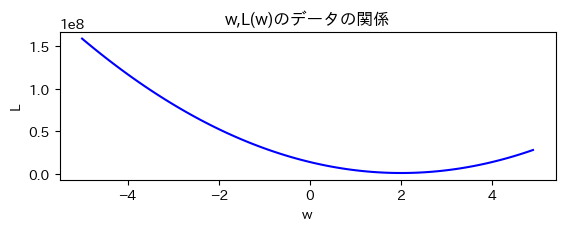

In [15]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5)
#fig.suptitle("all graph")

ax1 = fig.add_subplot(211, title="w,L(w)のデータの関係",xlabel="w", ylabel="L")
ax1.plot(w0, Lw, '-',c='blue')

fig.show()

- w=2のあたりで、Lが最小化することがわかる。これをwの実際の値を入れて調べるのではなく解析的に出したい

### 二次関数が最小となるwを求めたい=微分して傾きが0となるwを求める
損失関数Lの式は、$\boldsymbol{x}^i,y^i$をそれぞれN行ある行列として、$\boldsymbol{X},\boldsymbol{Y}$とすると
- $L(\boldsymbol{w})=\Sigma_i^N(y^i-\boldsymbol{w}\cdot\boldsymbol{x}^i)^2=(\boldsymbol{Y}-\boldsymbol{X}\cdot\boldsymbol{w})^2$
と表すことができる．
  
- $\frac{\partial L}{\partial w}=\frac{\partial}{\partial w}(\boldsymbol{Y}^T\boldsymbol{Y}-2\boldsymbol{w}^T\boldsymbol{X}^T\boldsymbol{Y}+\boldsymbol{w}^T\boldsymbol{w}\boldsymbol{X}^T\boldsymbol{X})=-2\boldsymbol{X}^T\boldsymbol{Y}+2w\boldsymbol{X}^T\boldsymbol{X}=0$
- $w=(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{Y}$

In [16]:
x.shape

(1000, 2)

In [17]:
xy = np.dot(x.T,y)

In [18]:
xx_inv = np.linalg.inv(np.dot(x.T,x))

In [19]:
xy.shape

(2,)

In [20]:
xx_inv.shape

(2, 2)

In [21]:
w = np.dot(xx_inv,xy)

In [22]:
w

array([1.99075583, 3.80571921])

In [23]:
# wは2,3のあたりと推定されたことを確認！

In [24]:
y_hat = np.dot(x,w)

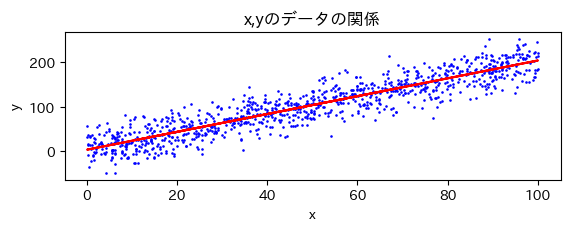

In [25]:
# x[:,0]とyのプロット
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=0.5)
#fig.suptitle("all graph")

ax1 = fig.add_subplot(211, title="x,yのデータの関係",xlabel="x", ylabel="y")
ax1.scatter(x[:,0], y, marker='.', s=3, c='blue')
ax1.plot(x[:,0], y_hat, 'r-')

fig.show()

### 勾配降下法
$L(w),w$のグラフを確認すると、wがある値$w_0$を持つ時に、その点でのL(w)の勾配$\Delta L(w_0) = \frac{\partial L(w)}{\partial w}|_{w=w_0}$を計算し、少しずつその方向にwを動かせば最小点に移動できそうだとわかる
このとき、移動量を$\eta$という所与の値（ハイパパラメータ）とすると、
- $w_{new}=w-\eta \Delta L(w_0)$
という形で繰り返し更新していくことで良い値を得ることができるだろう

In [26]:
import numpy as np
import torch
from torch.autograd import Variable

In [27]:
class Model:
    def __init__(self):
        self.w = Variable(torch.as_tensor(np.array([1.,1.],dtype=np.float64)), requires_grad=True)

    def __call__(self, x):
        a_val = torch.matmul(self.w,x.T)
        return a_val

In [28]:
model = Model()

In [29]:
def loss(y, y_hat):
    return torch.square(y_hat - y).mean()

In [30]:
def train(model, x, y, lr=0.01):
    current_loss = loss(y, model(x))
    current_loss.backward()

    with torch.no_grad():
#        print("model.w")
#        print(model.w)
#        print("model.w.grad.data*lr")
#        print(model.w.grad.data*lr)

        model.w -= model.w.grad.data * lr
#        print("new model.w")
#        print(model.w)

    model.w.grad.data.zero_()


In [31]:
tx = torch.from_numpy(x)
ty = torch.from_numpy(y)

In [32]:
current_loss = loss(ty, model(tx))

In [33]:
epochs = 20
tx = torch.from_numpy(x)
for epoch in range(epochs):
    with torch.no_grad():
        current_loss = loss(ty, model(tx))
        
    train(model, tx, ty, lr=0.0001)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")

Epoch 0: Loss: 4051.497682355319
Epoch 1: Loss: 1044.6589187217126
Epoch 2: Loss: 665.4371599867068
Epoch 3: Loss: 617.6096395541939
Epoch 4: Loss: 611.577457263268
Epoch 5: Loss: 610.8164900216673
Epoch 6: Loss: 610.7203268004894
Epoch 7: Loss: 610.7080084754408
Epoch 8: Loss: 610.7062646627041
Epoch 9: Loss: 610.7058545242907
Epoch 10: Loss: 610.7056126085888
Epoch 11: Loss: 610.7053919292025
Epoch 12: Loss: 610.705173948251
Epoch 13: Loss: 610.7049563277403
Epoch 14: Loss: 610.7047387728013
Epoch 15: Loss: 610.7045212462431
Epoch 16: Loss: 610.704303743373
Epoch 17: Loss: 610.7040862635971
Epoch 18: Loss: 610.7038688068384
Epoch 19: Loss: 610.7036513730851


In [34]:
model.w

tensor([2.0329, 1.0186], dtype=torch.float64, requires_grad=True)

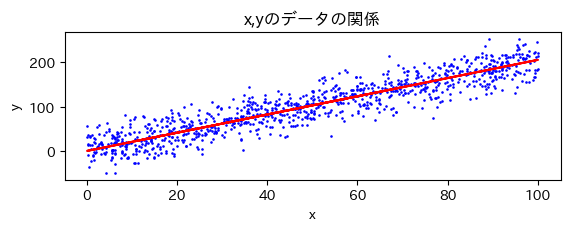

In [35]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=0.5)
#fig.suptitle("all graph")
y_hat = model(tx).detach()

ax1 = fig.add_subplot(211, title="x,yのデータの関係",xlabel="x", ylabel="y")
ax1.scatter(x[:,0], y, marker='.', s=3, c='blue')
ax1.plot(x[:,0], y_hat, 'r-')

fig.show()

### 最尤法によるパラメータ推定
- $\boldsymbol{w}=\begin{pmatrix} 2&3 \end{pmatrix}$として、データyが平均$\mu$、分散$\sigma^2$の正規分布からサンプルされるデータととらえる
- $y = \mathcal{N}(\mu=\boldsymbol{w}\cdot\boldsymbol{x},\sigma^2=10)$
- このときデータ$y$がサンプル（生成）される確率$P(y|\mathcal{N}(\mu,\sigma^2))$を尤度（そのデータの生成されやすさ）という
- すべてのデータに対して尤度が最大となるような$\mu, \sigma^2$を求めることを最尤（推定）法という

In [36]:
N = 1000
x0 = np.random.rand(N, 1) * 100
x = np.hstack([x0, np.ones((N, 1))])  # x: (N, 2), バイアス項を追加
w_true = np.array([2, 3])
y = np.dot(x, w_true) + np.random.normal(0, 10, N)

In [37]:
class Model:
    def __init__(self):
        self.w = Variable(torch.as_tensor(np.array([1.,1.,0.],dtype=np.float64)), requires_grad=True)

    def __call__(self, x):
        mean = torch.matmul(self.w[0:2],x.T)
        std = torch.exp(self.w[2])
        return mean, std

In [38]:
model = Model()

In [39]:
def loss_fn(y,x):
    mean, std = model(x)
    dist = torch.distributions.Normal(mean, std)
    return -torch.sum(dist.log_prob(y))

In [40]:
def train(model, x, y, lr=0.001, epochs=1000):
    for epoch in range(epochs):
        loss = loss_fn(y, x)
        loss.backward()

        with torch.no_grad():
            model.w -= lr * model.w.grad
            model.w.grad.zero_()

        if epoch % 10000 == 0:
            print(f"Epoch {epoch}: loss = {loss.item():.2f}, w = {model.w.data[:2].numpy()}, std = {torch.nn.functional.softplus(model.w[2]).item():.2f}")


In [41]:
tx = torch.from_numpy(x).double()
ty = torch.from_numpy(y).double()

In [42]:
# 学習開始
train(model, tx, ty, lr=0.00001, epochs=200001)

Epoch 0: loss = 1796229.24, w = [35.19407087  1.51226637], std = 35.90
Epoch 10000: loss = 8910.66, w = [32.96140653  1.47901967], std = 7.49
Epoch 20000: loss = 8793.70, w = [29.54576349  1.4281581 ], std = 7.38
Epoch 30000: loss = 8640.82, w = [25.64287995  1.37004285], std = 7.22
Epoch 40000: loss = 8419.69, w = [20.95559195  1.30025089], std = 7.00
Epoch 50000: loss = 8014.67, w = [14.6476152   1.20633701], std = 6.60
Epoch 60000: loss = 3755.80, w = [2.01782194 1.06177589], std = 2.43
Epoch 70000: loss = 3755.23, w = [2.0142733  1.30003858], std = 2.43
Epoch 80000: loss = 3754.87, w = [2.01147601 1.48785408], std = 2.43
Epoch 90000: loss = 3754.65, w = [2.00927214 1.63582617], std = 2.43
Epoch 100000: loss = 3754.52, w = [2.00753637 1.75236938], std = 2.43
Epoch 110000: loss = 3754.43, w = [2.00616955 1.84414061], std = 2.43
Epoch 120000: loss = 3754.38, w = [2.00509339 1.91639624], std = 2.43
Epoch 130000: loss = 3754.35, w = [2.00424614 1.97328195], std = 2.43
Epoch 140000: loss

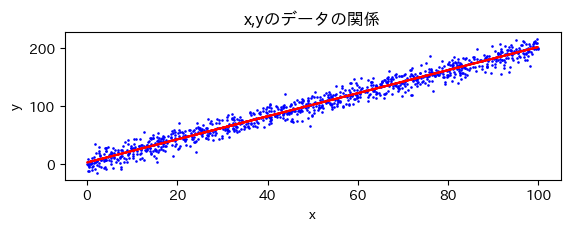

In [48]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=0.5)
#fig.suptitle("all graph")
y_hat = torch.matmul(tx,model.w[0:2]).detach().numpy()

ax1 = fig.add_subplot(211, title="x,yのデータの関係",xlabel="x", ylabel="y")
ax1.scatter(x[:,0], y, marker='.', s=3, c='blue')
ax1.plot(x[:,0], y_hat, 'r-')

fig.show()

### sklearnで解く

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:
reg = model.fit(x, y)

In [54]:
reg.coef_

array([2.00111178, 0.        ])

In [55]:
reg.intercept_

2.1837289167729352